Name : Akshaya Brian Tauro, Course Number : CS 584, Semester : Fall 2022

####This file consists of code which has traditional CNN model for the respiratory disease detection

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
import shutil
import matplotlib.pyplot as plt

In [12]:
train_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train"
test_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test"
validation_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation"

##Covid data
covid_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/COVID19"
covid_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/COVID19")
covid_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/COVID19"
covid_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/COVID19")
covid_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/COVID19"
covid_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/COVID19")

#Tuberculosis
tuberculosis_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/TUBERCULOSIS"
tuberculosis_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/TUBERCULOSIS")
tuberculosis_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/TUBERCULOSIS"
tuberculosis_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/TUBERCULOSIS")
tuberculosis_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/TUBERCULOSIS"
tuberculosis_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/TUBERCULOSIS")

#Pneumonia
pneumonia_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/PNEUMONIA"
pneumonia_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/PNEUMONIA")
pneumonia_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/PNEUMONIA"
pneumonia_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/PNEUMONIA")
pneumonia_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/PNEUMONIA"
pneumonia_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/PNEUMONIA")

#Normal
normal_train_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/NORMAL"
normal_train_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/train/NORMAL")
normal_val_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/NORMAL"
normal_val_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/validation/NORMAL")
normal_test_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/NORMAL"
normal_test_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/metaData/test/NORMAL")

#covid dataset length
print("\n" + "covid_train_images : " + str(len(covid_train_images))+
"\n" + "covid_val_images : " + str(len(covid_val_images))+
"\n" + "covid_test_images : " + str(len(covid_test_images)))

#tuberculosis dataset length
print("\n" + "tuberculosis_train_images : " + str(len(tuberculosis_train_images))+
"\n" + "tuberculosis_val_images : " + str(len(tuberculosis_val_images))+
"\n" + "tuberculosis_test_images : " + str(len(tuberculosis_test_images)))

#pneumonia dataset length
print("\n" + "pneumonia_train_images : " + str(len(pneumonia_train_images))+
"\n" + "pneumonia_val_images : " + str(len(pneumonia_val_images))+
"\n" + "pneumonia_test_images : " + str(len(pneumonia_test_images)))

#normal dataset length
print("\n" + "normal_train_images : " + str(len(normal_train_images))+
"\n" + "normal_val_images : " + str(len(normal_val_images))+
"\n" + "normal_test_images : " + str(len(normal_test_images)))

training_length =  len(covid_train_images)+len(pneumonia_train_images) + len(normal_train_images) + len(normal_train_images)
print(training_length)


covid_train_images : 10
covid_val_images : 5
covid_test_images : 5

tuberculosis_train_images : 10
tuberculosis_val_images : 5
tuberculosis_test_images : 5

pneumonia_train_images : 10
pneumonia_val_images : 5
pneumonia_test_images : 5

normal_train_images : 10
normal_val_images : 5
normal_test_images : 5
40


In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(rescale=1./255)
validation_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
MyData_datagen = ImageDataGenerator(rescale=1./255)

batch_size= 32
img_rows = 150
img_cols = 150
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,  #image folder
    target_size = (img_rows, img_cols), #resize images
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(img_rows, img_cols),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(img_rows, img_cols),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')




Found 40 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [14]:
# Creating network
from keras import layers
from keras import models
from keras.layers import BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape= (img_rows, img_cols, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# To further prevent overfitting, add dropout
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [15]:
#Compile network
from keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])



In [16]:

steps_per_epoch = int(training_length/batch_size)
print("steps_per_epoch : " + str(steps_per_epoch))
validation_steps = int(training_length/(batch_size * 2))
print("validation_steps : "+ str(validation_steps))

#Early stop setup
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_acc', patience=2, restore_best_weights=True)

#fit model
history = model.fit_generator(
    train_generator,
    verbose=1,
    steps_per_epoch = 25,
    epochs = 30,
    validation_data = validation_generator,
    # validation_steps=25,
    callbacks=early_stop
    )



steps_per_epoch : 1
validation_steps : 0


<ipython-input-16-c220e6caef12>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
 2/25 [=>............................] - ETA: 41s - loss: 1.3952 - acc: 0.2000    

25/25 [==============================] - 5s 132ms/step - loss: 1.3952 - acc: 0.2000 - val_loss: 1.3886 - val_acc: 0.2500


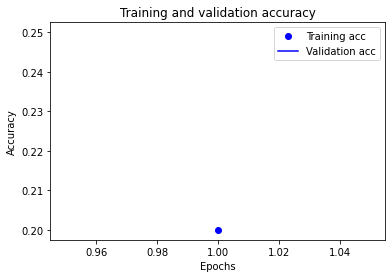

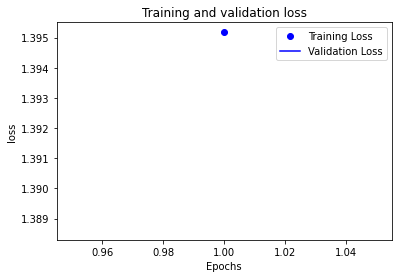

<ipython-input-17-84bcc0805c3c>:29: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)


test acc:  0.25


In [17]:

# Plot Results
import matplotlib.pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc,  'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(epochs, loss,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


test_loss, test_acc = model.evaluate_generator(test_generator)
print('test acc: ', test_acc)

In [18]:
model.save("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaData-CNN-grayscale.h5")
